# Image Preprocessing

## 00 Open an Image with OpenCV

In [1]:
import cv2
import matplotlib.pyplot as plt

image_file_path = "../data/image-processing-tutorial-data/"
image_temp_path = '../processed/temp/'

# load image
img = cv2.imread(image_file_path + 'page_01.jpg')

In [21]:
def display_full_image(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    
    if im_data.ndim > 2:
        height, width, depth = im_data.shape
    else:
        height, width = im_data.shape
        
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()
    

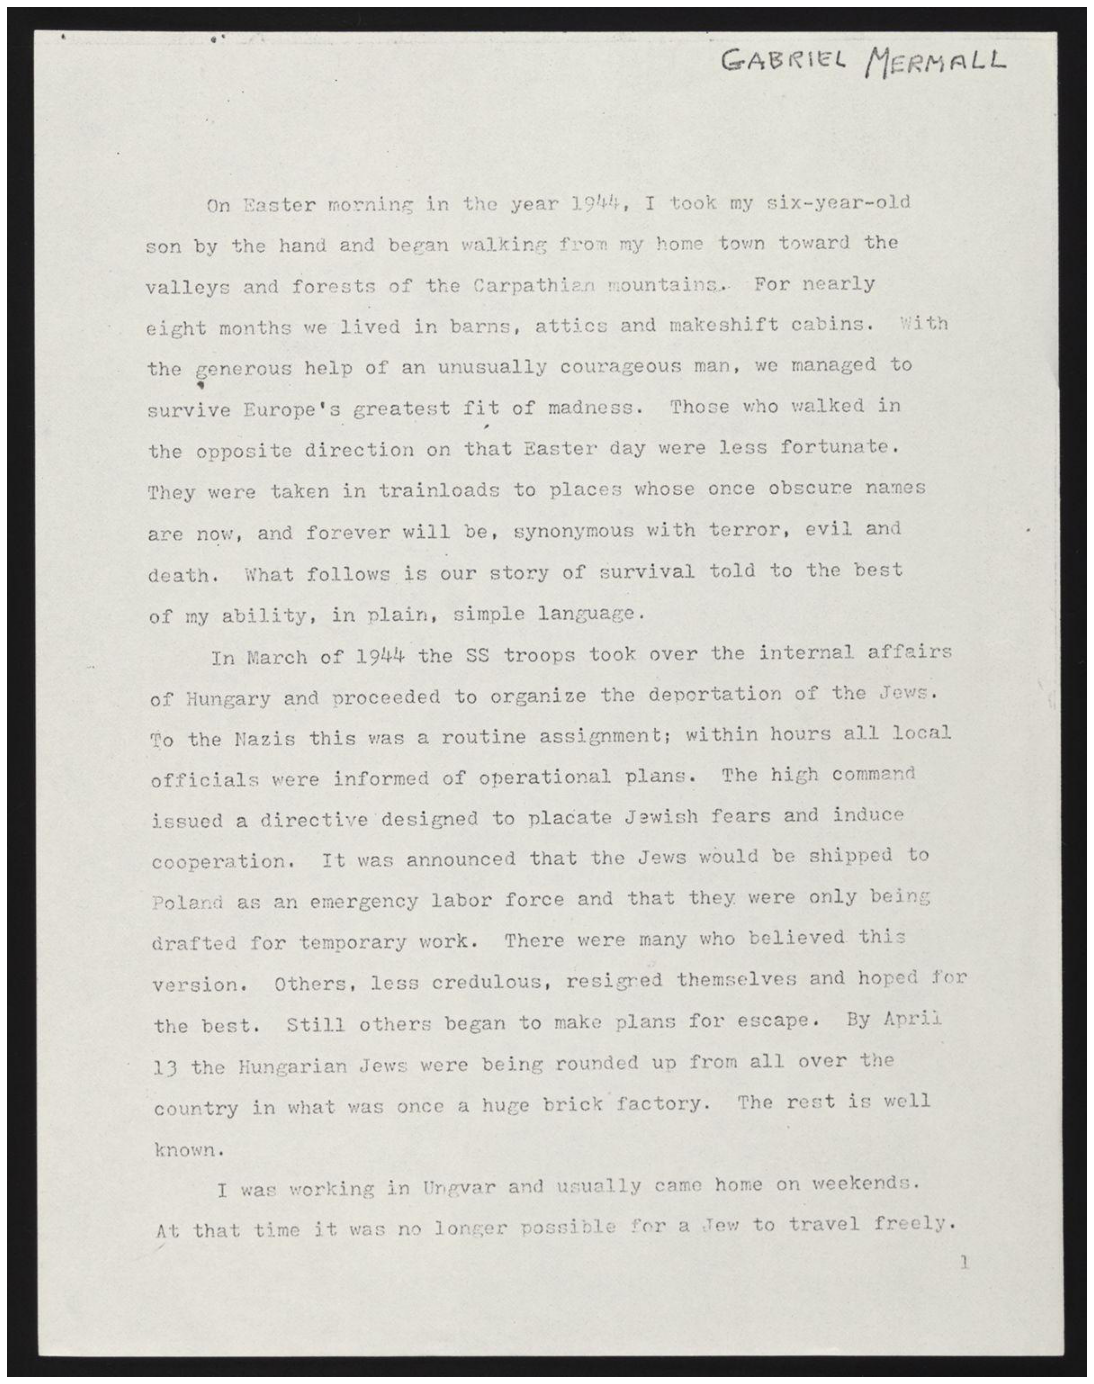

In [22]:
display_full_image(image_file_path + 'page_01.jpg')

# 01 Inverted Images

In [23]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite(image_temp_path + 'inverted_image.jpg', inverted_image)

True

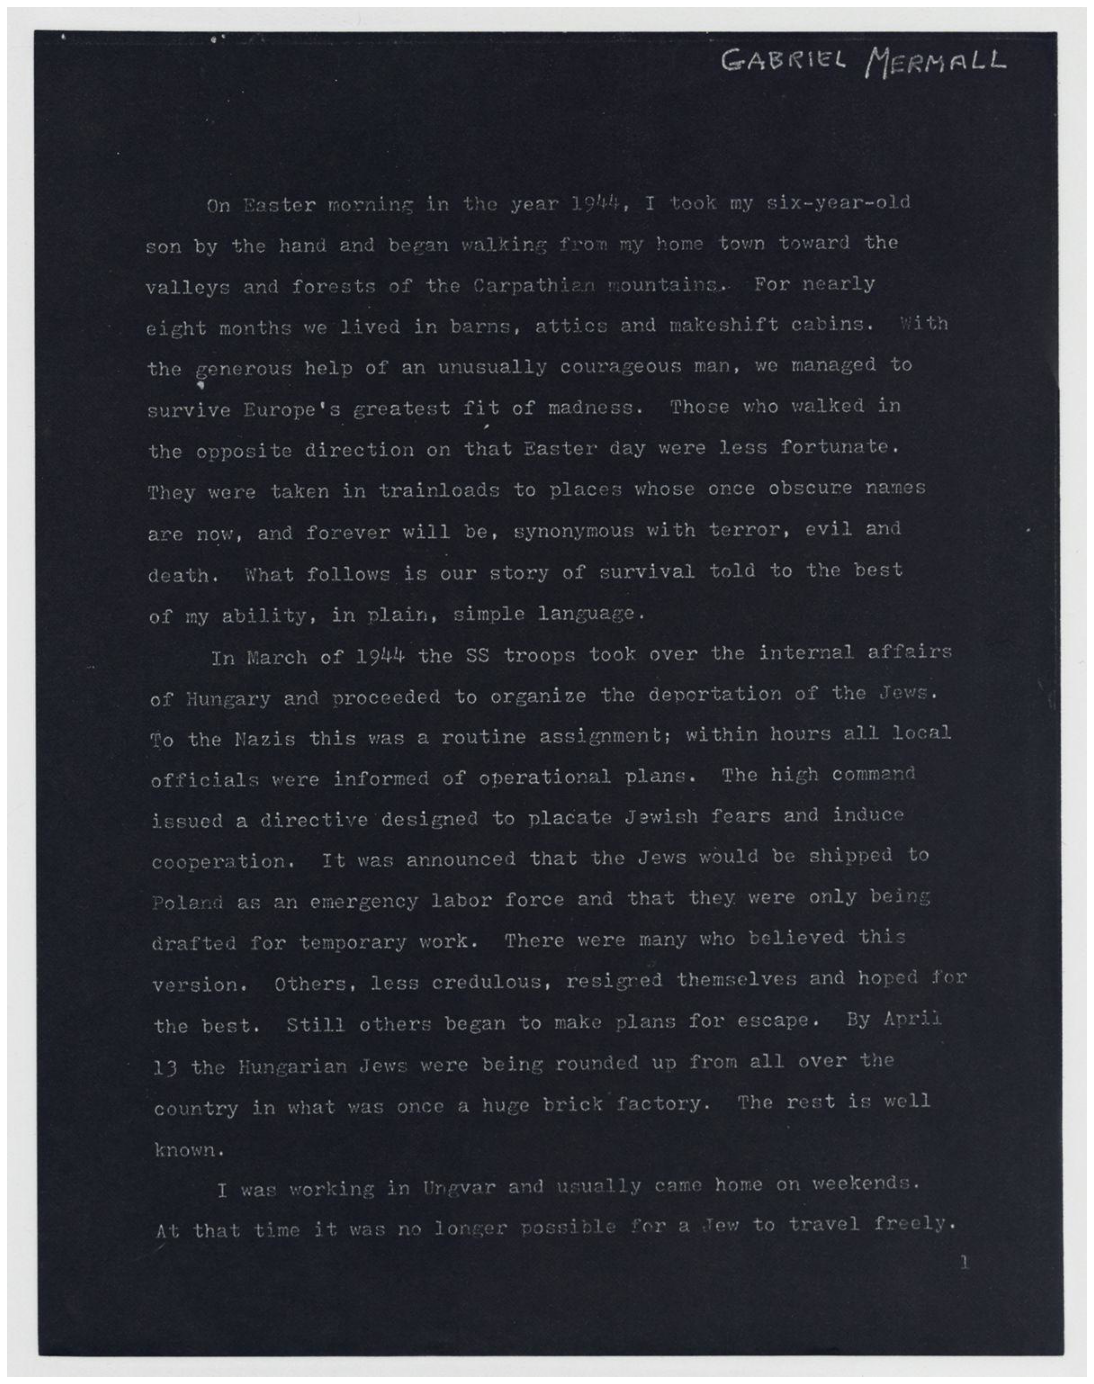

In [24]:
display_full_image(image_temp_path + "inverted_image.jpg")

# 02 Rescaling

# 03 Binarization

In [25]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_image = grayscale(img)
cv2.imwrite(image_temp_path + "gray_image.jpg", gray_image)

True

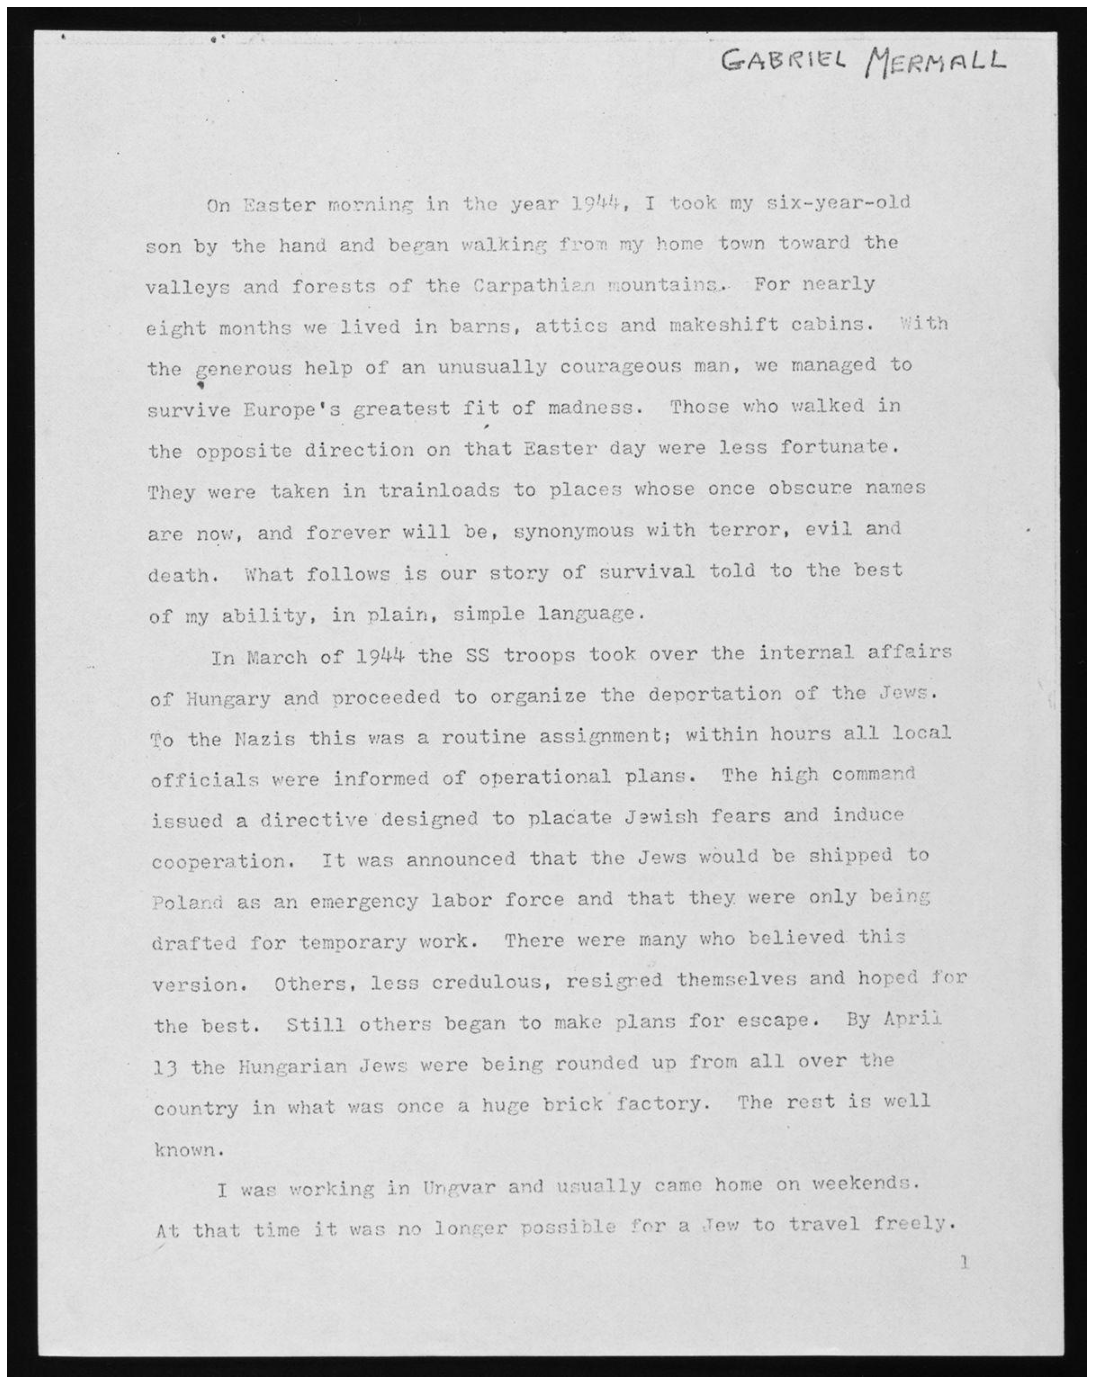

In [27]:
display_full_image(image_temp_path + "gray_image.jpg")
# gray_image.shape

In [32]:
threshold, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite(image_temp_path + 'bw_image.jpg', im_bw)

True

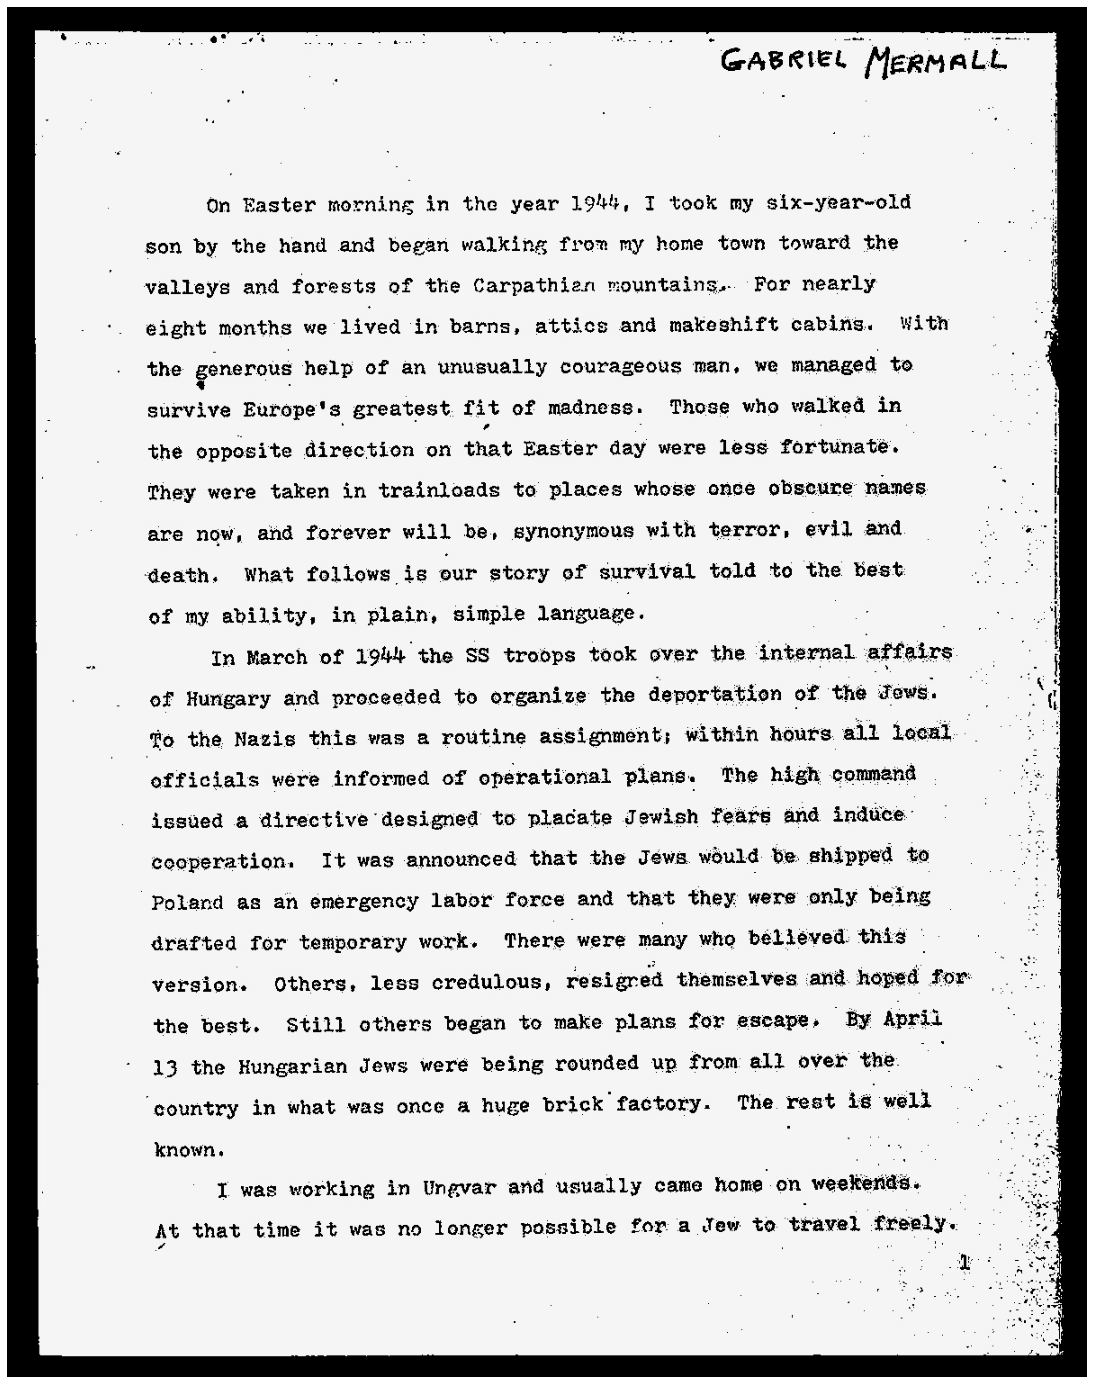

In [33]:
display_full_image(image_temp_path + 'bw_image.jpg')

# 04 Noise Removal

In [37]:
import numpy as np

def noise_removal(image):
    
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    
    # erode the image
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    
    # morphone the image
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    
    return image

In [35]:
no_noise = noise_removal(im_bw)
cv2.imwrite(image_temp_path + "no_noise.jpg", no_noise)

True

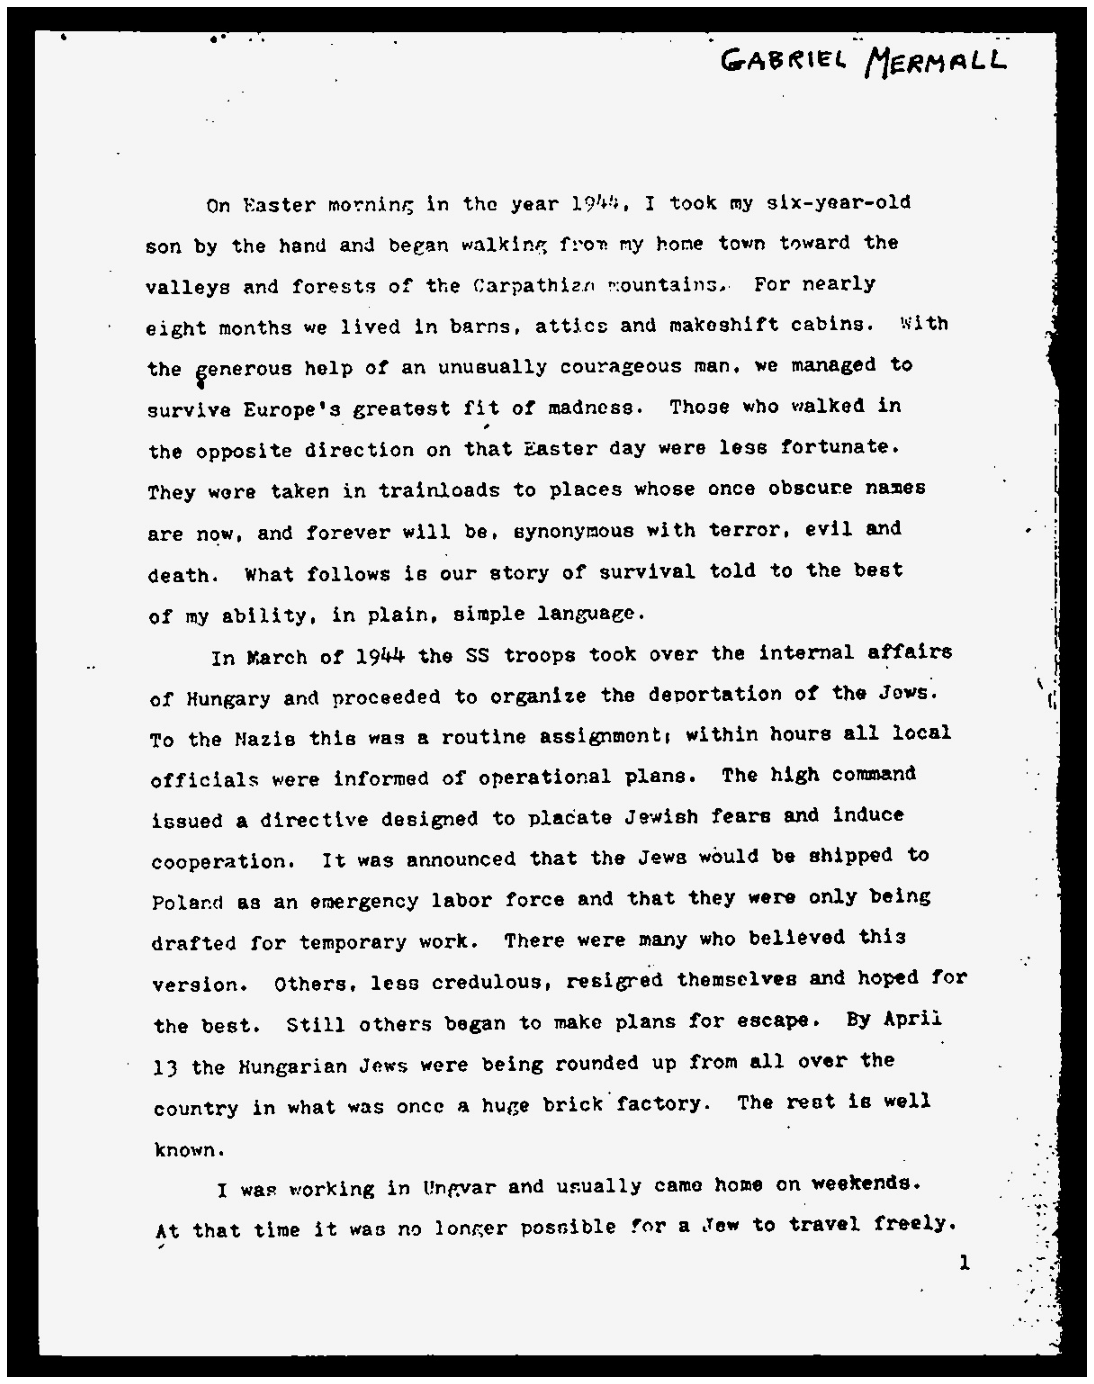

In [36]:
display_full_image(image_temp_path + "no_noise.jpg")

# 05 Dilation and Erosion

For text where the fonts are a little to thin or too small

In [43]:
def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2, 2), np.uint8)
    
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    
    return image

In [44]:
erode_image = thin_font(no_noise)
cv2.imwrite(image_temp_path + "eroded_image.jpg", erode_image)

True

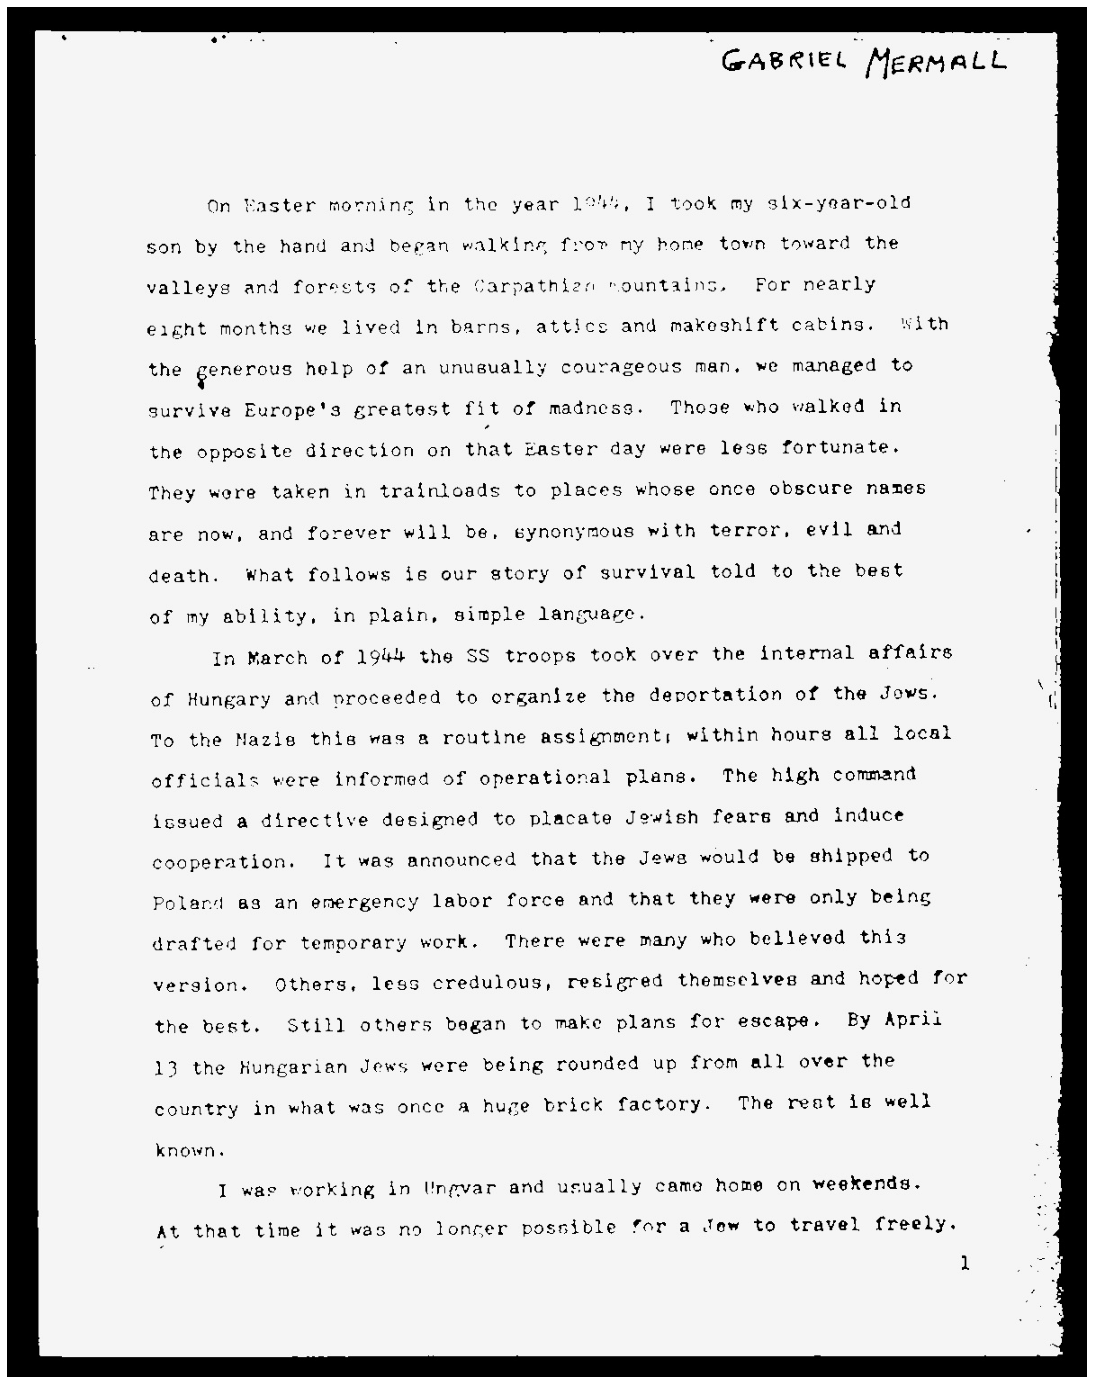

In [45]:
display_full_image(image_temp_path + "eroded_image.jpg")

In [46]:
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2, 2), np.uint8)
    
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    
    return image

In [49]:
dilated_image = thick_font(no_noise)
cv2.imwrite(image_temp_path + "dilated_image.jpg", dilated_image)

True

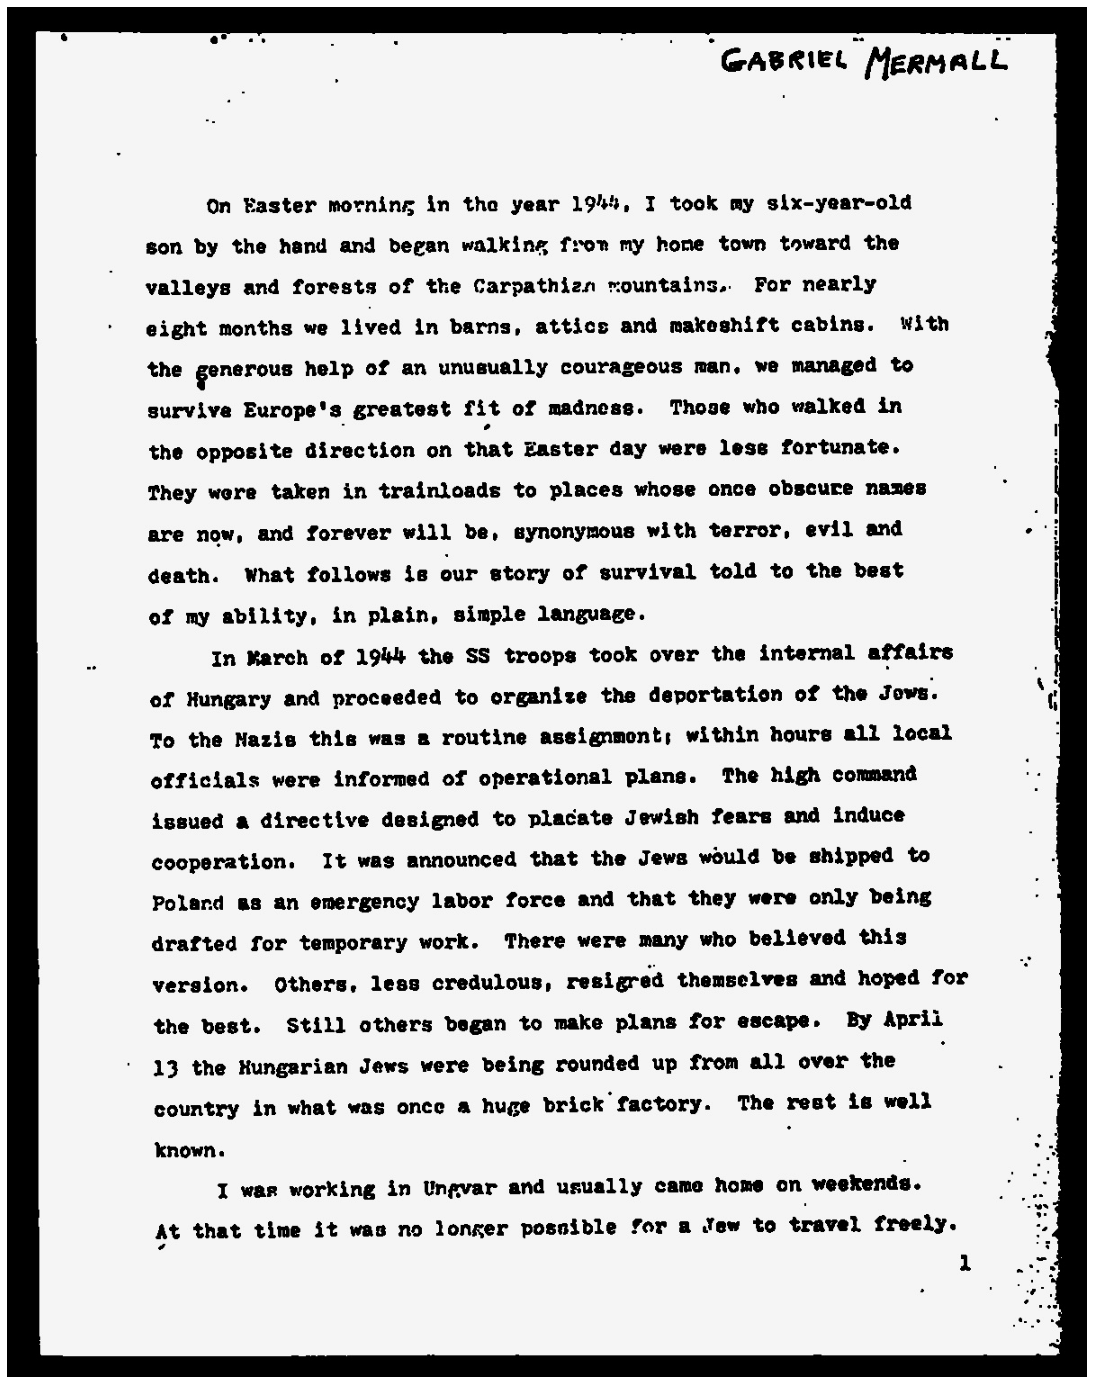

In [50]:
display_full_image(image_temp_path + "dilated_image.jpg")

# 06 Rotation / Deskewing

In [ ]:
new = cv2.imread('../data/image-processing-tutorial-data/page_01_rotated.JPG')